In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
annotations = pd.read_csv("../data/annotations/songs_info.csv", index_col = 0)
annotations

,file_name,Artist,Song title,start of the segment (min.sec),end of the segment (min.sec),Genre,Mediaeval 2013 set
song_id,,,,,,,
2,2.mp3,The New Mystikal Troubadours,Tonight A Lonely Century,0.48,1.33,Blues,development
3,3.mp3,Kevin MacLeod,DD Groove,0.36,1.21,Blues,evaluation
4,4.mp3,Kevin MacLeod,Slow Burn,1.29,2.14,Blues,development
5,5.mp3,My Bubba & Mi,Nothing Much,0.36,1.21,Blues,development
7,7.mp3,Kevin MacLeod,Hustle,0.20,1.05,Blues,development
...,...,...,...,...,...,...,...
995,995.mp3,Benjamin Bret,Honte De Toi,1.08,1.53,Rock,development
996,996.mp3,Jahzzar,Fireworks,0.17,1.02,Rock,development
997,997.mp3,Halloween,Monster On Campus,0.28,1.13,Rock,development


In [4]:
annot_development = annotations[annotations["Mediaeval 2013 set"] == "development"]
len(annot_development)

619

In [17]:
train_ids, valid_ids = train_test_split(annot_development.index, train_size = 0.8, 
                                        random_state = 31415, stratify = annot_development.Genre)

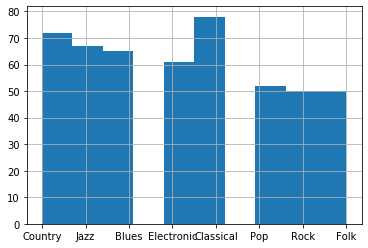

In [18]:
annotations.loc[train_ids].Genre.hist()

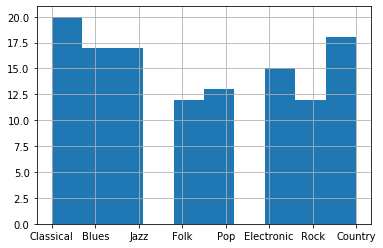

In [19]:
annotations.loc[valid_ids].Genre.hist()

In [22]:
annotations["ttv"] = annotations["Mediaeval 2013 set"]
annotations.loc[train_ids, "ttv"] = "train"
annotations.loc[valid_ids, "ttv"] = "validation"
annotations.ttv.value_counts()

train         495
evaluation    125
validation    124
Name: ttv, dtype: int64

In [24]:
annotations.to_csv("../data/annotations/songs_info_ttv.csv")